In [1]:
!pip install ctgan
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: Faker
    Found existing installation: Faker 19.11.0
    Uninstalling Faker-19.11.0:
      Successfully uninstalled Faker-19.11.0


In [2]:
from ctgan import CTGAN

import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import time

start=time.time()
le = LabelEncoder()

dataset = pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/telco-non-internet.csv')

dataset['state']=le.fit_transform(dataset['state'])
dataset['area_code']=le.fit_transform(dataset['area_code'])
dataset['international_plan']=le.fit_transform(dataset['international_plan'])
dataset['voice_mail_plan']=le.fit_transform(dataset['voice_mail_plan'])
dataset['churn']=le.fit_transform(dataset['churn'])

df1=dataset[dataset['churn']==0]
df=dataset[dataset['churn']==1]

batch_size = 5000
epochs = 100
model = CTGAN(batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(df)

end = time.time()

print("The time of execution of preprocess:",
      (end-start), "s")

Gen. (-1.29) | Discrim. (0.20): 100%|██████████| 100/100 [01:11<00:00,  1.40it/s]

The time of execution of preprocess: 88.82342267036438 s


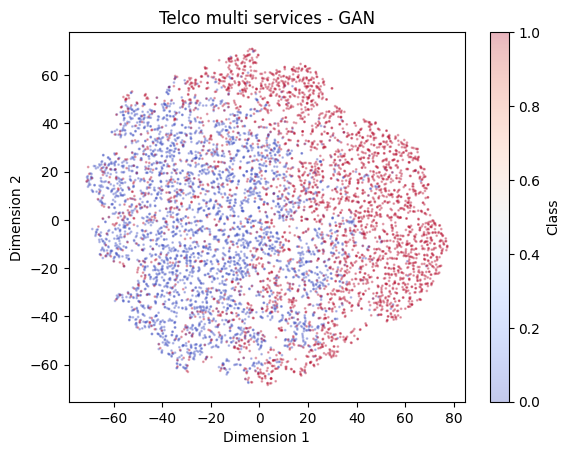

In [4]:
n_generated_data = 3054
generated_df = model.sample(n_generated_data)

#concat original data and gan data
data_concat = pd.concat([df, generated_df])
# combine data churn and not churn
data=pd.concat([df1, data_concat])

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

features = data.drop(['churn'], axis=1)
labels = data['churn']

 #Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Telco multi services - GAN')
plt.colorbar(label='Class')
plt.show()

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  1 17:31:40 2020

@author: manav

Modifed on 23 AUG 2022

by mahayasa adiputra
"""

import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as mt
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score
import math

#data=data.dropna()
#data=data.fillna(0)

start1=time.time()



X=data.drop(['churn'],axis=1)
y=data["churn"]

enn = EditedNearestNeighbours(n_neighbors=3)
X, y = enn.fit_resample(X, y)
#ncr = NeighbourhoodCleaningRule(n_neighbors=5, kind_sel='all')
#X, y = ncr.fit_resample(X, y)
#tomek_links = TomekLinks()
#X, y = tomek_links.fit_resample(X, y)


#kfold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

end1 = time.time()

print("The time of execution of preprocess:",
      (end1-start1), "s")

The time of execution of preprocess: 0.2769467830657959 s


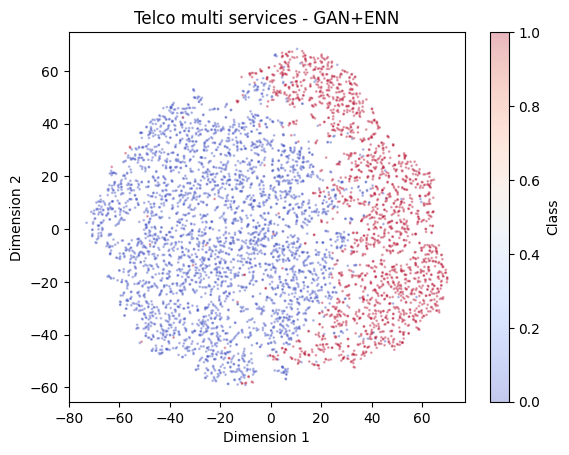

In [6]:
#import matplotlib.pyplot as plt
#from sklearn.manifold import TSNE

features = X
labels =y

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Telco multi services - GAN+ENN')
plt.colorbar(label='Class')
plt.show()

In [ ]:
data = pd.concat([X, y], axis=1)
#fisher discriminant ratio
def fishers_discriminant_ratio(feature):
    class1_data=data[data['churn']==0][feature]
    class2_data=data[data['churn']==1][feature]
    mean1 = sum(class1_data) / len(class1_data)
    mean2 = sum(class2_data) / len(class2_data)

    variance1 = sum((x - mean1) ** 2 for x in class1_data) / len(class1_data)
    variance2 = sum((x - mean2) ** 2 for x in class2_data) / len(class2_data)

    between_variance = len(class1_data) * (mean1 - mean2) ** 2
    within_variance = variance1 + variance2

    discriminant_ratio = between_variance / within_variance
    return discriminant_ratio

In [ ]:
exclude_feature = 'churn'
for feature in data.columns:
    if feature != exclude_feature:
        discriminant_ratio = fishers_discriminant_ratio(feature)
        print(f"Discriminant Ratio for {feature}: {discriminant_ratio}")

Discriminant Ratio for state: 713.6026146265216
Discriminant Ratio for account_length: 3138.885821219311
Discriminant Ratio for area_code: 25.20211514589942
Discriminant Ratio for international_plan: 1241.254613599307
Discriminant Ratio for voice_mail_plan: 0.23460433876093142
Discriminant Ratio for number_vmail_messages: 741.8648910271319
Discriminant Ratio for total_day_minutes: 8202.130736842932
Discriminant Ratio for total_day_calls: 894.4638375609018
Discriminant Ratio for total_day_charge: 950.7050866322381
Discriminant Ratio for total_eve_minutes: 2849.9471779707196
Discriminant Ratio for total_eve_calls: 1243.9662943526257
Discriminant Ratio for total_eve_charge: 541.4720398497071
Discriminant Ratio for total_night_minutes: 2031.4904587714975
Discriminant Ratio for total_night_calls: 799.5312510054513
Discriminant Ratio for total_night_charge: 88.02800294681603
Discriminant Ratio for total_intl_minutes: 1418.515844960521
Discriminant Ratio for total_intl_calls: 260.156004626370

In [ ]:

start2 = time.time()
classifier=KNeighborsClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============KNN Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end2 = time.time()
print("The time of execution of knn:",
      (end2-start2), "s")

===============KNN Performance====================
F1 score: 0.960
STD F1 Score: 0.010
Recall: 0.942
Specitifity: 0.986
AUC ROC: 0.994
G-Mean: 0.964
The time of execution of knn: 1.1408612728118896 s


In [ ]:

start4 = time.time()
classifier=DecisionTreeClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============DT Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end4 = time.time()
print("The time of execution of dt:",
      (end4-start4), "s")

===============DT Performance====================
F1 score: 0.931
STD F1 Score: 0.001
Recall: 0.926
Specitifity: 0.958
AUC ROC: 0.940
G-Mean: 0.942
The time of execution of dt: 1.4911079406738281 s


In [ ]:
start5 = time.time()
classifier=GaussianNB()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============NB Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end5 = time.time()
print("The time of execution of NB:",
      (end5-start5), "s")

===============NB Performance====================
F1 score: 0.934
STD F1 Score: 0.005
Recall: 0.942
Specitifity: 0.957
AUC ROC: 0.981
G-Mean: 0.949
The time of execution of NB: 0.22182106971740723 s


In [ ]:
start3=time.time()

classifier = GradientBoostingClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============GBM Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))


gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end3 = time.time()
print("The time of execution of gbm:",
      (end3-start3), "s")


===============GBM Performance====================
F1 score: 0.983
STD F1 Score: 0.004
Recall: 0.973
Specitifity: 0.996
AUC ROC: 0.999
G-Mean: 0.984
The time of execution of gbm: 39.155109167099 s


In [ ]:
start2=time.time()
#Training XGBoost
#classifier = XGBClassifier(eta=0.3, max_depth = 4, gamma=0, min_child_weight=1)
classifier = XGBClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============XGBoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')
end2 = time.time()

print("The time of execution of xgb:",
      (end2-start2), "s")

===============XGBoost Performance====================
F1 score: 0.986
STD F1 Score: 0.002
Recall: 0.981
Specitifity: 0.995
AUC ROC: 0.999
G-Mean: 0.988
The time of execution of xgb: 16.984904289245605 s


In [ ]:
from sklearn.ensemble import RandomForestClassifier
start2=time.time()
classifier = RandomForestClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============Random Forest Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end2 = time.time()

print("The time of execution of rf:",
      (end2-start2), "s")

===============Random Forest Performance====================
F1 score: 0.981
STD F1 Score: 0.002
Recall: 0.979
Specitifity: 0.990
AUC ROC: 0.999
G-Mean: 0.984
The time of execution of rf: 23.53377628326416 s


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,algorithm='SAMME.R')

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============ADABoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

===============ADABoost Performance====================
F1 score: 0.912
STD F1 Score: 0.007
Recall: 0.876
Specitifity: 0.962
AUC ROC: 0.972
G-Mean: 0.918
